# PROJECT 31: WEBSCRAPED TWEET DATA EXPLORATORY DATA ANALYSIS

## Author: Taiwo Owoseni
## Last Edited: 07/16/2022

# INSTALLATION PROCEDURES

In [24]:
#Install for pdf export
!pip install pandoc

In [3]:
#Import python packages
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import string
import emoji
import pandas as pd
import re, string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

#Assign functions within nltk package
ps = nltk.PorterStemmer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))

import warnings
warnings.filterwarnings("ignore")

import os
stop=set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /Users/ebuwa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ebuwa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/ebuwa/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Read in webscraped tweets as data

In [4]:
data = pd.read_csv('../data/tweet_data.csv')

In [5]:
#Inspect
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50001 non-null  int64 
 1   Date        50001 non-null  object
 2   User        50001 non-null  object
 3   Tweet       50001 non-null  object
 4   Location    2028 non-null   object
 5   HashTags    49997 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


In [6]:
data.head()

,Unnamed: 0,Date,User,Tweet,Location,HashTags
0,0,2022-07-09 23:50:33+00:00,club_southside,It's always great to get together with the @Th...,"Indianapolis, IN",['AbortionRightsAreHumanRights']
1,1,2022-07-09 23:49:00+00:00,GenZOregonizers,we’re pissed and ready to mobilize. \n\n#VoteT...,NaN,"['VoteThemOut', 'AbortTheCourt', 'BansOffOurBo..."
2,2,2022-07-09 23:42:55+00:00,cyddahlia,To stand in solidarity with those who were in ...,NaN,"['NFTGiveaway', 'abortionrights', 'AbortionRig..."
3,3,2022-07-09 23:42:07+00:00,shannonselby1,@AshleyRParker @yabutaleb7 @tylerpager Why is ...,NaN,"['AbortionRightsAreHumanRights', 'ExpandSCOTUS']"
4,4,2022-07-09 23:41:39+00:00,queenRobina,#WomensRights #AbortionRightsAreHumanRights I ...,NaN,"['WomensRights', 'AbortionRightsAreHumanRights']"


In [7]:
data.describe()

,Unnamed: 0
count,50001.000000
mean,25000.000000
std,14434.189742
min,0.000000
25%,12500.000000
50%,25000.000000
75%,37500.000000
max,50000.000000


# DATA MANIPULATION

#### Clean Data

In [16]:
#Create a function to extract emojis
def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en']) 

for word in line_list: 
            if word in emoji.UNICODE_EMOJI:
                new_line_list.append(emoji.demojize(word))
                
for word in line_list:
  emojis = emoji.distinct_emoji_list(word)
  new_line_list.extend([emoji.demojize(is_emoji) for is_emoji in emojis])
    

#Create a function to process spaces
def preprocessing_text(text):
    # Make lowercase
    text = text.str.lower().str.replace('\n', ' ')
    return text

#Create a function to change sentence case
def clean_text(text):
  '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
  and remove words containing numbers.'''

  text = str(text).lower()
  text = re.sub('\[.*?\]', ' ', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub('\w*\d\w*', '', text)
  return text

def final_processing(text):
  text = re.sub(r"https\S+|www\S+https\S+", ' ',text, flags=re.MULTILINE)
  text = re.sub(r'\@w+|\#',' ',text)
  text = re.sub(r'[^\w\s]',' ',text)
  text = re.sub(r'[^\w\s]','',text)
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  stem_text = [ps.stem(word) for word in filtered_text]
  return " ".join(stem_text)


In [17]:
tweets = data.Tweet

In [18]:
#Create new variables, "mention" and "emoji"
data["mention"] = tweets.apply(lambda x: re.findall(r"@(\w+)", x))
data["emojis"] = tweets.apply(lambda x: extract_emojis(x))

#Create new variable, "clean tweet" devoid of mentions and emojis
clean_tweet = tweets.apply(lambda x: re.sub("@[A-Za-z0-9_]+"," ", x))
clean_tweet = clean_tweet.apply(lambda x: re.sub("#[A-Za-z0-9_]+"," ", x))


TypeError: 'function' object is not subscriptable

In [11]:
#Inspect
clean_tweet[0]

NameError: name 'clean_tweet' is not defined

In [11]:
#In new variable, swap https for http
clean_tweet = clean_tweet.apply(lambda x: re.sub("http\S+", " http ",  x))
clean_tweet = clean_tweet.str.encode('ascii', 'ignore').str.decode('ascii')

In [12]:
#Assign variables accordingly, applying prior functions
data['clean_tweet'] = clean_tweet
clean_tweet = clean_tweet.apply(final_processing)
clean_tweet = preprocessing_text(clean_tweet) 
data['clean_tweet'] = clean_tweet

### EDA

In [13]:
#Inspect dataset
data.head()

,Unnamed: 0,Date,User,Tweet,Location,HashTags,mention,emojis,clean_tweet
0,0,2022-07-09 23:50:33+00:00,club_southside,It's always great to get together with the @Th...,"Indianapolis, IN",['AbortionRightsAreHumanRights'],[The_BYB],,it alway great get togeth watch men women socc...
1,1,2022-07-09 23:49:00+00:00,GenZOregonizers,we’re pissed and ready to mobilize. \n\n#VoteT...,NaN,"['VoteThemOut', 'AbortTheCourt', 'BansOffOurBo...",[],,piss readi mobil http
2,2,2022-07-09 23:42:55+00:00,cyddahlia,To stand in solidarity with those who were in ...,NaN,"['NFTGiveaway', 'abortionrights', 'AbortionRig...",[],,to stand solidar dc michigan state capitol tod...
3,3,2022-07-09 23:42:07+00:00,shannonselby1,@AshleyRParker @yabutaleb7 @tylerpager Why is ...,NaN,"['AbortionRightsAreHumanRights', 'ExpandSCOTUS']","[AshleyRParker, yabutaleb7, tylerpager]",,whi news women right demolish includ
4,4,2022-07-09 23:41:39+00:00,queenRobina,#WomensRights #AbortionRightsAreHumanRights I ...,NaN,"['WomensRights', 'AbortionRightsAreHumanRights']",[],,i made tiktok canadian woman show support towa...


In [26]:
#Inspect data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   50001 non-null  int64 
 1   Date         50001 non-null  object
 2   User         50001 non-null  object
 3   Tweet        50001 non-null  object
 4   Location     2028 non-null   object
 5   HashTags     49997 non-null  object
 6   mention      50001 non-null  object
 7   emojis       50001 non-null  object
 8   clean_tweet  50001 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


In [29]:
#Inspect null values

null= data.isnull().sum().sort_values(ascending=False)
total =data.shape[0]
percent_missing= (data.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)

#We suspect this (high missingness of location variable) is because most users turn off their location on twitter

Null Values in each column:
    column name  Total missing  Percent missing
0     Location          47973         0.959441
1     HashTags              4         0.000080
2   Unnamed: 0              0         0.000000
3         Date              0         0.000000
4         User              0         0.000000
5        Tweet              0         0.000000
6      mention              0         0.000000
7       emojis              0         0.000000
8  clean_tweet              0         0.000000


## Distribution of Character Counts: Number of Characters in Each Tweet

Text(0.5, 1.0, 'Distribution of Character Counts in Tweets')

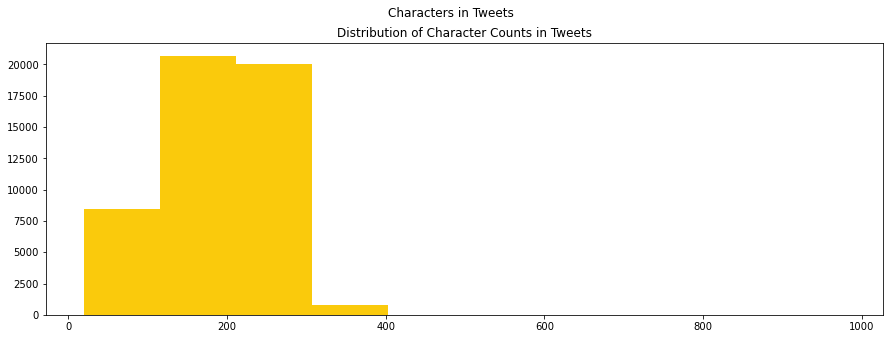

In [22]:
#Distribution of Character Counts: Number of Characters in Each Tweet
fig,ax = plt.subplots(1,1, figsize=(15,5))
tweet_len = data['Tweet'].str.len()
ax.hist(tweet_len,color='#FACA0C')
fig.suptitle('Characters in Tweets')
ax.set_title('Distribution of Character Counts in Tweets') #Left-skewed


## Distribution of Word Counts: Number of Words in Each Tweet

Text(0.5, 1.0, 'Distribution of Word Counts in Tweets')

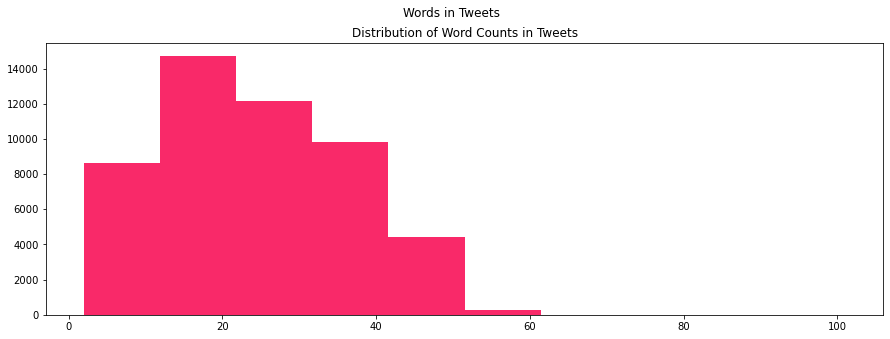

In [21]:
fig,ax =plt.subplots(1,1, figsize=(15,5))
tweet_len=data['Tweet'].str.split().map(lambda x: len(x))

ax.hist(tweet_len,color='#F92969')
fig.suptitle('Words in Tweets')
ax.set_title('Distribution of Word Counts in Tweets')

## Distribution of Average Word Length in Each Tweet

<AxesSubplot:xlabel='Tweet', ylabel='Density'>

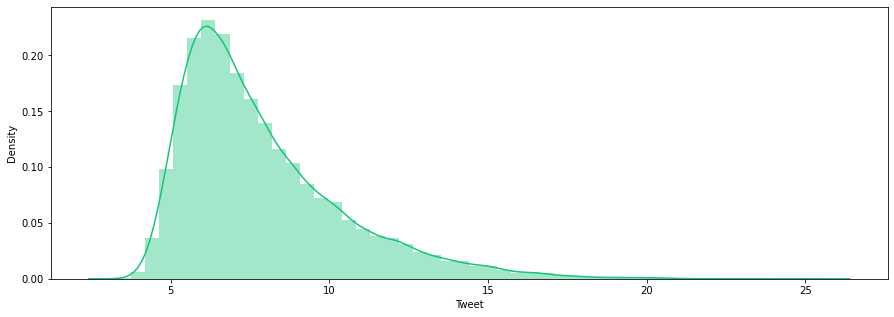

In [35]:
#Plot a Kernel Plot
fig,ax =plt.subplots(1,1, figsize=(15,5))
word=data['Tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax,color='#17C37B')

## Distribution of Stopwords in Each Tweet

In [36]:
def create_corpus(target):
    corpus=[]
    
    for x in data['Tweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

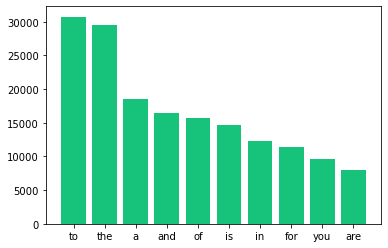

In [42]:
from collections import defaultdict,Counter
corpus=create_corpus("positive")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B');

## Distribution of Punctuations in Each Tweet

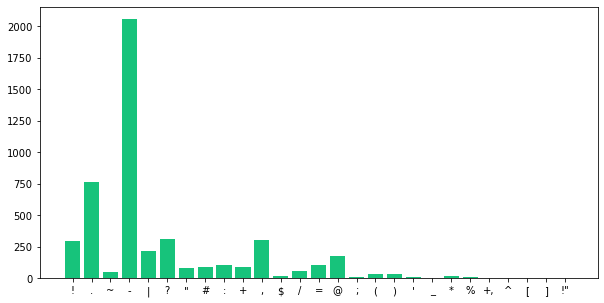

In [62]:
plt.figure(figsize=(10,5))
corpus=create_corpus("positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B');

## Distribution of Non-Stop Words in Each Tweet

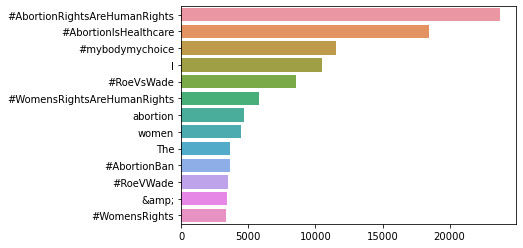

In [45]:

counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x);

## Distribution of Hashtags in Each Tweet

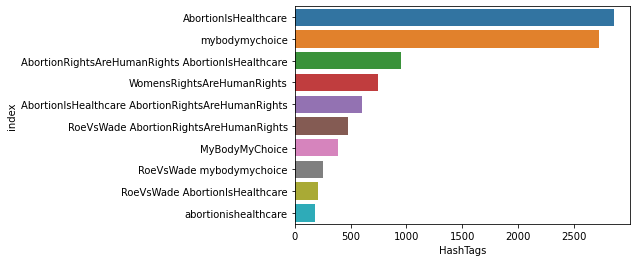

In [59]:
def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)
data['HashTags']=data['Tweet'].apply(lambda x:find_hash(x))

temp_new =data['HashTags'].value_counts()[:][1:11].to_frame().reset_index()
sns.barplot(y="index",x="HashTags", data = temp_new);

## Distribution of Mentions in Each Tweet

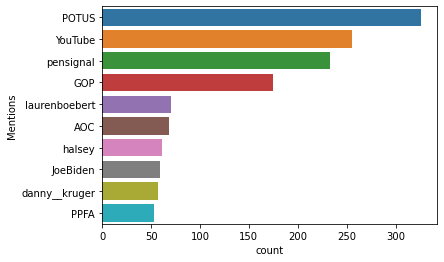

In [61]:
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
data['mentions']=data['Tweet'].apply(lambda x:mentions(x))

temp=data['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

sns.barplot(y="Mentions",x="count", data = temp);

# Ngram Exploration

## Bigrams

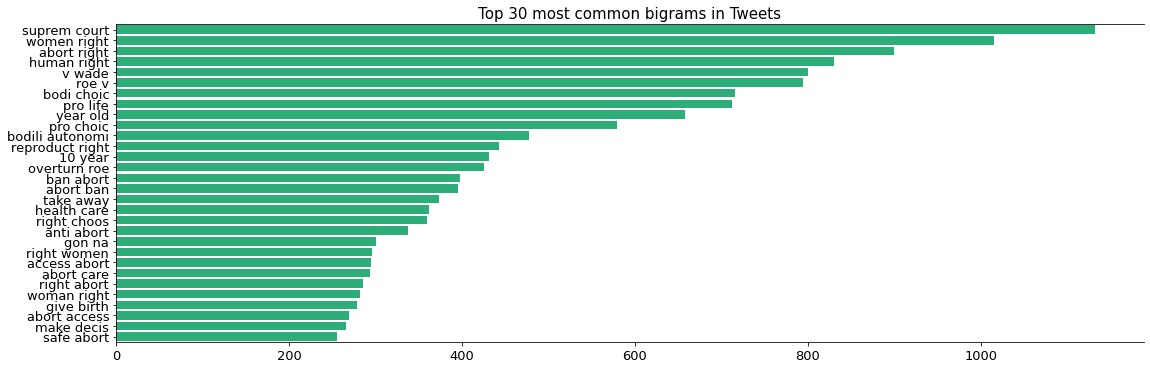

In [65]:
# Bigrams
bigrams = defaultdict(int)
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 30

for tweet in data['clean_tweet']:
    for word in generate_ngrams(tweet, n_gram=2):
        bigrams[word] += 1
        
df_bigrams = pd.DataFrame(sorted(bigrams.items(), key=lambda x: x[1])[::-1])
fig,ax =plt.subplots(1,1, figsize=(15,5))
plt.tight_layout()

sns.barplot(y=df_bigrams[0].values[:N], x=df_bigrams[1].values[:N], ax=ax, color='#17C37B')
ax.spines['right'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_title(f'Top {N} most common bigrams in Tweets', fontsize=15)

plt.show()

## Trigrams

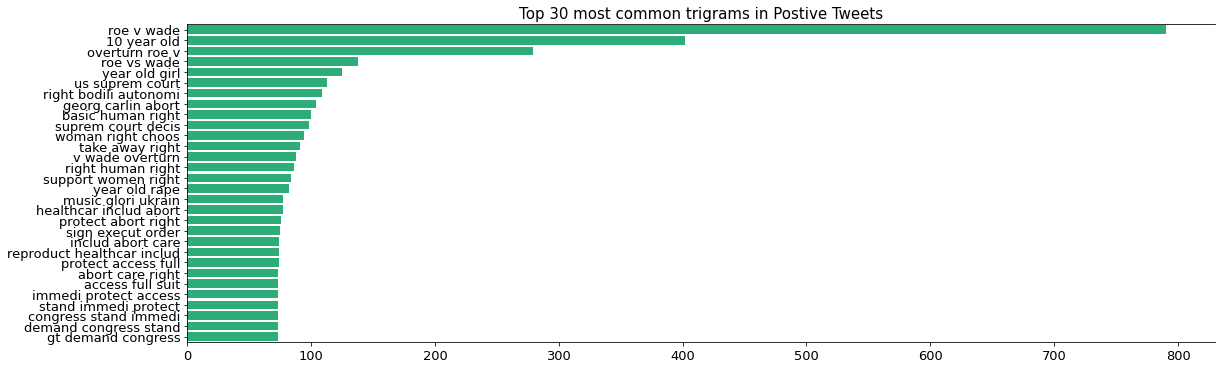

In [67]:
# Triigrams
trigrams = defaultdict(int)

for tweet in data['clean_tweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        trigrams[word] += 1
        
df_trigrams = pd.DataFrame(sorted(trigrams.items(), key=lambda x: x[1])[::-1])
fig,ax =plt.subplots(1,1, figsize=(15,5))
plt.tight_layout()

sns.barplot(y=df_trigrams[0].values[:N], x=df_trigrams[1].values[:N], ax=ax, color='#17C37B')
ax.spines['right'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_title(f'Top {N} most common trigrams in Postive Tweets', fontsize=15)

plt.show()

## Distribution of Users

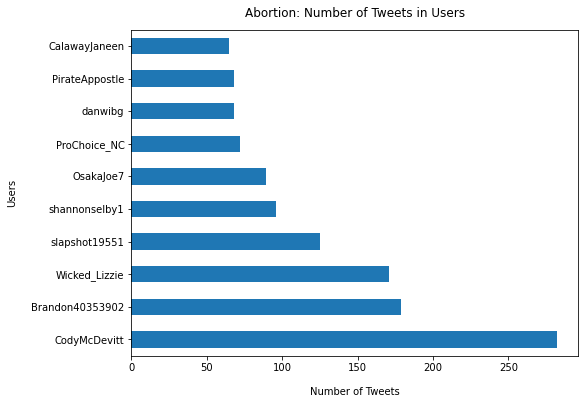

In [23]:
data['User'].value_counts().nlargest(n=10).plot(kind='barh', figsize=(8, 6));

plt.xlabel("Number of Tweets", labelpad=14)
plt.ylabel("Users", labelpad=14)
plt.title("Abortion: Number of Tweets in Users", y=1.02);